<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# 8. Assessed Practical

## 8.1 Introduction

### 8.1.1 Task overview

These notes describe the practical work you must submit for assessment in this course.

The practical comes in two parts: (1) data preparation (50%); (2) modelling (50%). 

**It is important that you complete both parts of this exercise.**

The submission for Part 1 of the coursework (worth 50% of the marks) is the Monday after Reading week (12:00 Noon). That is Monday $12^{th}$ November 2018. 

The submission for Part 2 will be $7^{th}$ January 2019 (12:00 Noon). Submission is through the usual Turnitin link on the [course Moodle page](https://moodle-1819.ucl.ac.uk/course/view.php?id=2796#section-4).


- **Part 1: Data Preparation**
  
     The first task you must complete is to produce a dataset of the proportion of HUC catchment 13010001 (Rio Grande headwaters in Colorado, USA) that is covered by snow for **two years** (not necessarily consecutive), along with associated datasets on temperature (in C) and river discharge at the Del Norte monitoring station. You will use these data in the modelling work in Part 2 of the coursework.
     
     You **may not** use data from the years 2005 or 2006, as this will be given to you in illustrations of the material.

    The dataset you produce must have a value for **the mean snow cover, temperature and discharge in the catchment for every day over each year.**

    Your write up **must** include fully labelled graph(s) of snow cover, temperature and discharge for the catchment for each year (with units as appropriate), along with some summary statistics (e.g. mean or median, minimum, maximum, and the timing of these). 
    
    You **must** provide evidence of how you got these data (i.e. the code and commands you ran to produce the data).
    
**Checklist:**
    
    * provide fully commented/documented code for all operations.
    * provide two years of **daily** data (not 2005 or 2006)
    * Generate datasets of:
        * mean snow cover (0.0 to 1.0) for the catchment for each day of the year
        * temperature (C) at the Del Norte monitoring station for each day of the year
        * river discharge at the Del Norte monitoring station for each day of the year
    * Produce a table of summary statistics for each of the 3 datasets (one for easch year)
    * produce graphs of the 3 datasets for each year (as function of day of year)
    * produce an `npz` file containing the 3 datasets, one for each year.
    * produce images of snow cover spatial data for the catchment for **13 samples** spaced equally through the year, one set of images for each year. You need to do this for the data pre-interpolation and aftyer you have done the interpolation.
    
    
- **Part 2: Modelling**

    You will have prepared two years of data in Part 1 of the work. 
    
    If, for some reason, you have failed to generate an appropriate dataset, you may use datasets that will be provided for you for the years 2005 and 2006. There will be no penalty for that in your Part 2 submission: failure to gernerate the datasets will be accounted for in marks allocated for Part 1.
    
    You will be given a simple hydrological model of snowmelt.
    
    Use one of these years to calibrate the (snowmelt) hydrological model and one year to test it. 
    
    The model parameter estimate *must* be objective (i.e. you can't just arbitrarily choose a set) and optimal in some way you must define (you *must* state the equation of the cost function you will try to minimise and explain the approach used).
    
    You **must** state the values of the model parameters that you have estimated and show evidence for how you went about calculating them. Ideally, you should also state the uncertainty in these parameter estimates (not critical to pass this section though).
    
    You **must** quantify the goodness of fit between your measured flow data and that produced by your model, both for the calibration exercise and the validation.
    
**Checklist:**
    
    * Provide a site intoduction and an introduction to the purpose of the exercise ('Introduction')
    * Provide an introduction to the modelling and calibration/validation ('Method') 
    * provide code that reads in the datasets and performs the model calibration and validation ('Code')
    * Provide a table of results on model parameter calibration (and ideally, uncertainty) ('Results')
    * Provide graphs of the observed and modelled river discharge data for the calibration year ('Results')
    * Provide graphs of the observed and modelled river discharge data for the validation year ('Results')
    * Assess the accuracy of the calibration and validation ('Results')
    * Discuss the results in the light of the introduction ('Discussion')
    * Draw conclusions about issues associated with modelling of this sort ('Conclusion')
    

You **must** work individually on this task. If you do not, it will be treated as plagiarism. By reading these instructions for this exercise, we assume that you are aware of the UCL rules on plagiarism. You can find more information on this matter in your student handbook. If in doubt about what might constitute plagiarism, ask one of the course convenors.

## 8.1.2 Purpose of the work

The hydrology of the Rio Grande Headwaters in Colorado, USA is snowmelt dominated. It varies considerably from year to year and may very further under a changing climate.

We can build a mathemetical ('environmental') model to describe the main physical processes affecting hydrology in the catchment. Such a model could help understand current behaviour and allow some prediction about possible future scenarios.

**What you are going to do is to build, calibrate and test a (snowmelt) hydrological model, driven by observations in the Rio Grande Headwaters in Colorado, USA**

![](images/calibrate.png)

![](https://www.blm.gov/sites/blm.gov/files/hero_backgrounds/NM_Rio_Grande_del_Norte_Sign_640.jpg)

The purpose of the model will be to describe the streamflow at the Del Norte measurement station, just on the edge of the catchment. You will use environmental (temperature) data and snow cover observations to drive the model. You will perform calibration and testing by comparing model output with observed streamflow data.

### 8.1.2.1 Del Norte

The average climate for Del Norte is:

![](images/usco0103climatedelnorte.png)

Further general information is available from various [websites](http://www.usclimatedata.com/climate.php?location=USCO0103), including [NOAA](http://www.ncdc.noaa.gov).

![www.coloradofishing.net](http://www.coloradofishing.net/images/fishtails/ft_riogrande3.jpg)



You can visualise the site Del Norte 2E  [here](http://mesonet.agron.iastate.edu/sites/site.php?station=CO2184&network=COCLIMATE).


### 8.1.2.2 Previous work

In part 1, you should have developed datasets for two years for:

    * mean snow cover (0.0 to 1.0) for the catchment for each day of the year
    * temperature (C) at the Del Norte monitoring station for each day of the year
    * river discharge at the Del Norte monitoring station for each day of the year
    
You should use these datasets in part 2 of this work.

If for some reason, you are unable to do that, you may use the datasets provided here:



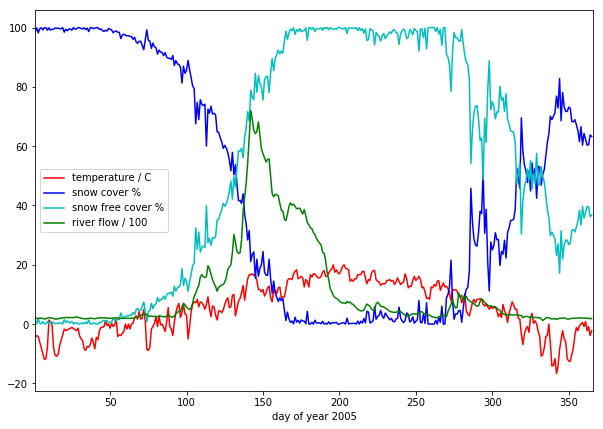

In [2]:
# load a pre-cooked version of the data for 2005 (NB -- Dont use this year!!!
# except perhaps for testing)

# load the data from a pickle file
import pickle
import pylab as plt
import numpy as np
%matplotlib inline

pkl_file = open('data/data2005.pkl', 'rb')
# note encoding='latin1' because pickle generated in python2
data = pickle.load(pkl_file, encoding='latin1')
pkl_file.close()

# set up plot
plt.figure(figsize=(10,7))
plt.xlim(data['doy'][0],data['doy'][-1]+1)
plt.xlabel('day of year 2005')

# plot data
plt.plot(data['doy'],data['temp'],'r',label='temperature / C')
plt.plot(data['doy'],data['snowprop']*100,'b',label='snow cover %')
plt.plot(data['doy'],100-data['snowprop']*100,'c',label='snow free cover %')
plt.plot(data['doy'],data['flow']/100.,'g',label='river flow / 100')
plt.legend(loc='best')

we have plotted the streamflow (scaled) in green, the snow cover in blue, and the non snow cover in cyan and the temperature in red. It should be apparent that thge hydrology is snow melt dominated, and to describe this (i.e. to build the simplest possible model) we can probably just apply some time lag function to the snow cover.

## 8.2 The model

What we need is a model that provides an estimate of flow $F$ (`data['flow']`) as a function of time $t$ (days).

The information we have to help in this is : snow proportion $p$ (`data['snowprop']`) and temperature $T$ (`data['temp']`) 


### 8.2.1 Snow water equivalent

In a snow-melt dominated catchment, we are assuming that the flow can be related to water released from the snow pack. The purpose of any model then is to model that release. The units of this (flow) will be units of volume per unit time.

The water contained in the snow pack is called the Snow Water Equivalent (SWE) and is a measure of water volume. To estimate this, we would need to know the snow equivalent depth $d$ and the snow area. The snow area is the catchment area multipled by $p$, so:

$$
SWE = A p d
$$

where $A$ is the catchment area. 

We have no information on depth, so will assume that it varies in the same way as snow cover. Letting:

$$
d = \frac{k}{A} p
$$

Then:

$$
SWE = k p^2
$$

### 8.2.2 Snow water melt

From examination of the data plotted above, we can see that the timing of the river discharge corresponds broadly to:

* the presence of snow cover ($p > 0$)
* temperature above some threshold ($T > T_{thresh}$)

where $T_{thresh}$ is the threshold temperature. 

This is hardly surprising and exactly what we would expect in a snowmelt-dominated catchment. We might reasonably expect $T_{thresh}$ to be $0 C$, but this might not be the case (why?).

A simple model of the SWE entering the system then is to make it equal to some proportion $k_p$ of the SWE on days when melting occurs.

Then:

$$
SWE_{melt}(t) = k_p(t) {SWE}(t)
$$

where $SWE_{melt}$ is the proportion of SWE released per unit time (day).

One function we could use for $k_p$ is to make it proportionate to the excess temperature.

We can define this as:

$$
k_p(T) = \frac{T-T_{thresh}}{T_{max}}
$$

with negative $k_p$ set to zero, and $T_{max}$ the maximum temperature. So, if $T = T_{thresh} + T_{max}$. $k_p = 1$ and the maximum amount of SWE is available as melt water.

### 8.2.3 Base flow

Close examination of the data suggests there is a base level flow (i.e. a constant flow throughout the year) of around 200 units. We can simply add this to our model as $F_{base}$.

$$
F_{non-base}(t) = F(t) - F_{base}
$$

$F_{base}$ is easily estimated from the January mean value of flow.


### 8.2.4 Total amount of water

We then have modelled flow ${F}_{model}$ entering the system:

$$
{F}_{model}(t) =  F_{base} + SWE_{melt}(t)
$$


$$
{F}_{model}(t) =  F_{base} + k MAX \left(0, \frac{T-T_{thresh}}{T_{max}} p(t)^2 \right)
$$



Further, we can assume that the total amount of flow that we model (minus the base flow) should equal that measured (summed over all days). 

Then:

$$
\Sigma_t{{F}_{model}(t)} = \Sigma_t{F(t)}
$$

so

$$
\Sigma_t{F(t)} = \Sigma_t{F_{base}} + k \Sigma_t{MAX \left(0, \frac{T-T_{thresh}}{T_{max}} p(t)^2 \right)}
$$

This allows us to infer the value of $k$ from the data:

$$
k  = \frac{\Sigma_t{\left( F(t) - F_{base} \right) }}{\Sigma_t{MAX \left(0, \frac{T-T_{thresh}}{T_{max}} p(t)^2 \right)}}
$$


F_base = 203.8709677419355


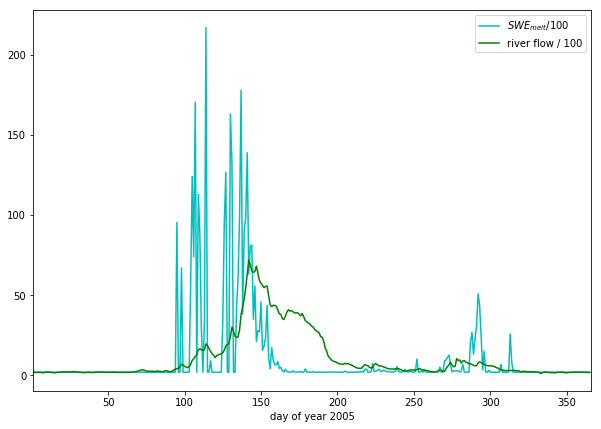

In [35]:
# Guess some values
Tthresh = 6

# we can estimate the base flow from the 
# mean January value
F_base = data['flow'][:31].mean()
print(f'F_base = {F_base}')


# 
p           = data['snowprop']
k_p         = (data['temp'] - Tthresh)/data['temp'].max()
k_p         = np.max([np.zeros_like(k_p),k_p],axis=0)
swe_melt_k  = p * p * k_p

# take away the base flow from flow
nonbase_flow = data['flow'] - F_base

# k
k = nonbase_flow.sum() / swe_melt_k.sum()

model_flow = swe_melt_k * k + F_base

# set up plot
plt.figure(figsize=(10,7))
plt.xlim(data['doy'][0],data['doy'][-1]+1)
plt.xlabel('day of year 2005')

# plot data
plt.plot(data['doy'],model_flow/100,'c',label='$SWE_{melt}$/100')
plt.plot(data['doy'],data['flow']/100.,'g',label='river flow / 100')
plt.legend(loc='best')

This already looks quite reasonable, although:

* the flow is smoother than the $SWE_{melt}$ data
* there seems to be a delay between snowmelt occuring and flow appearing in the measurements

The function that describes such delay (and that can cause smoothing) can be called a network response function. It is often modelled as a Laplace function (an exponential). The idea is that for any 'flash' input to the catchment, this network response function will give us what we would measure as a hydrograph at the monitoring station (or elsewhere):

$$
nrf = e^{-m t}
$$

Text(0.5, 1.0, 'network response function $m=0.03$')

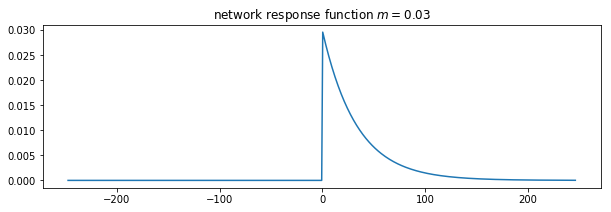

In [36]:
# decay parameter
# nrf = exp(-m x)
m  = 0.03

plt.figure(figsize=(10,3))
# window size
ndays = 15 * int(1/m)
nrf_x = np.arange(ndays) - ndays/2
# function for nrf
nrf = np.exp(-m*nrf_x)
nrf[nrf_x<0] = 0

# normalise so that sum is 1
nrf = nrf/nrf.sum()

# plot
plt.plot(nrf_x,nrf)
plt.title(f'network response function $m={m}$')

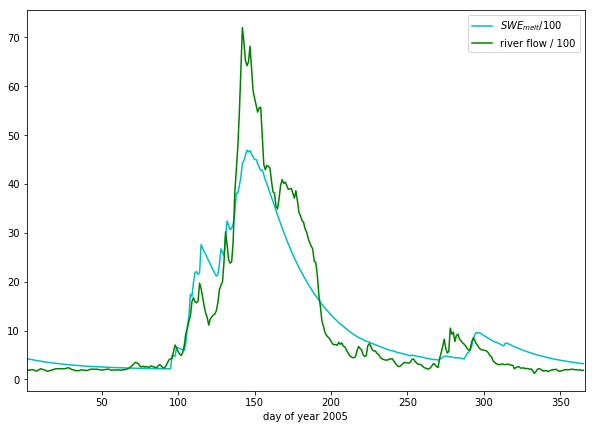

In [37]:
import scipy
import scipy.ndimage.filters

# convolve NRF with data
model_flow_nrf = scipy.ndimage.filters.convolve1d(model_flow, nrf)

# set up plot
plt.figure(figsize=(10,7))
plt.xlim(data['doy'][0],data['doy'][-1]+1)
plt.xlabel('day of year 2005')

# plot data
plt.plot(data['doy'],model_flow_nrf/100,'c',label='$SWE_{melt}$/100')
plt.plot(data['doy'],data['flow']/100.,'g',label='river flow / 100')
plt.legend(loc='best')

So, we have defined a simple snow melt model. It has two parameters that we3 can vary:

* $T_{thresh}$: the lower temperature threshold
* $m$: the network response function decay factor

The modelled flow is normalised so that the total flow equals the total measured flow. The base flow is estimated from the data (January mean flow value).

Note that the values of the additional model parameters, $T_{max}$, $F_{base}$ and the scaling term $k$ should be constant for all years modelled. i.e. ytou work out these values from one year of data, then apply them to the modelling of other years.

A quick guess at the parameter values provides a not unreasonable match to the data. As a model that predicts behaviour well for the main spring melt events, this may be quite useful. That said, the model is very simple and might easily be improved.

If we accept that this is a sufficient model for the present, we can attempt to improve on the model performance by optimising the (two) parameters.

To do this, we can use standard optimisation techniques (that you have already covered in the course) to provide imprtoved parameter estimates. There are only two model parameters to optimise, so this should be quite straightforward. It should also be easy to visualise the error function. 

**Exercise** 

Write a Python function that takes the `data` dictionary and the model parameters and returns the modelled flow for given $T_{thresh}$ and $m$. 

Vary the two parameters a bit and note the impact on the match between modelled and observed flow data.

In [ ]:
# Exercise

## 8.3 Coursework

You need to submit you coursework in the usual manner by the usual submission date.

You **must** work individually on this task. If you do not, it will be treated as plagiarism. By reading these instructions for this exercise, we assume that you are aware of the UCL rules on plagiarism. You can find more information on this matter in your student handbook. If in doubt about what might constitute plagiarism, ask one of the course convenors.

### 8.3.1 Summary of coursework requirements

- **Part 2: Modelling**

        You will have prepared two years of data in Part 1 of the work. 
    
    If, for some reason, you have failed to generate an appropriate dataset, you may use datasets that will be provided for you for the years 2005 and 2006. There will be no penalty for that in your Part 2 submission: failure to gernerate the datasets will be accounted for in marks allocated for Part 1.
    
    You have been given a simple (two parameter) hydrological model of snowmelt.
    
    Use one of these years to calibrate the (snowmelt) hydrological model and one year to test (validate) it. 
    
    The model parameter estimate *must* be objective (i.e. you can't just arbitrarily choose a set) and optimal in some way you must define (you *must* state the equation of the cost function you will try to minimise and explain the approach used). You should state why you have taken any particular approach for the optimisation, and make consideration of what options you might have.
    
    You **must** state the values of the model parameters that you start with and those youy have estimated. ~TYou must show evidence for how you went about calculating the optimised pareameters. Ideally, you should also state the uncertainty in these parameter estimates (not critical to pass this section though). You should try to at least make some comment on the likely uncertainty.
    
    You **must** quantify the goodness of fit between your measured flow data and that produced by your model, both for the calibration exercise and the validation.
    
**Checklist:**
    
    * Provide a site intoduction and an introduction to the purpose of the exercise ('Introduction')
    * Provide an introduction to the modelling and calibration/validation ('Method') 
    * provide code that reads in the datasets and performs the model calibration and validation ('Code')
    * Provide a table of results on model parameter calibration (and ideally, uncertainty) ('Results')
    * Provide graphs of the observed and modelled river discharge data for the calibration year ('Results')
    * Provide graphs of the observed and modelled river discharge data for the validation year ('Results')
    * Assess the accuracy of the calibration and validation ('Results')
    * Discuss the results in the light of the introduction ('Discussion')
    * Draw conclusions about issues associated with modelling of this sort ('Conclusion')
    



### 8.3.2 Summary of Advice

The second task revolves around using the model that we have developed above. You should probably put the elements of the model together in a function. You have been through previous examples in Python where you attempt to estimate some model parameters given an initial estimate of the parameters and some cost function to be minimised. Solving the model calibration part of problem should follow those same lines then. Testing (validation) should be easy enough. Don't forget to include the estimated parameters (and other relevant information, e.g. your initial estimate, uncertainties if available) in your write up.

There is quite a lot of data presentation here, and you need to provide *evidence* that you have done the task. Make sure you use graphs (e.g. one of the inoputs used for calibration and validation years, and one for modelled and predicted flow, etc.), and tables (e.g. model parameter estimates) throughout, as appropriate.

### 8.3.3 Further advice

There is plenty of scope here for going beyond the basic requirements (e.g. improving the model), if you get time and are interested (and/or want a higher mark!).

You will be given credit for all additional work included in the write up, **once you have achieved the basic requirements**. So, there is no point (i.e. you will not get credit for) going off on all sorts of interesting lines of exploration here *unless* you have first completed the core task.

Be aware that if you decide to develop a new model, and this has more parameters than the existing model, the fact that your model fit is better than that for the excisting model *does not* imply that your model is an impriovement. This is because you will have increased the degrees of freedom in the model, so an improved fit is not longer adequate proof of model improvement.

### 8|.3.4 Structure of the Report

The required elements of the report are:

    
```
    1. Provide a site intoduction and an introduction to the purpose of the exercise ('Introduction') [5]
    2. Provide a context and introduction to the modelling and calibration/validation and a visualisation of the input data you use ('Method') [10]
    3. provide code that reads in the datasets and performs the model calibration and validation ('Code') [10]
    4. A Results section with appropriate graphs and tables [10]
    5. Discuss the results in the light of the introduction ('Discussion') [10]
    6. Draw conclusions about issues associated with modelling of this sort ('Conclusion') [5]
```
The figures in brackets indicate the percentage of marks that we will award for each section of the report.


### 8.3.5 Computer Code

#### General requirements

You will obviously need to submit computer codes as part of this assessment. Some flexibility in the style of these codes is to be expected. For example, some might write a class that encompasses the functionality for all tasks. Some poeple might have multiple versions of codes with different functionality. All of these, and other reasonable variations are allowed.

All codes needed to demonstrate that you have performed the core tasks are required to be included in the submission. You should include all codes that you make use of in the main body of the text in the main body. Any other codes that you want to refer to (e.g. something you tried out as an enhancement and didn’t quite get there) you can include in appendices.

All codes should be well-commented. Part of the marks you get for code will depend on the adequacy of the commenting.

#### Degree of original work required and plagiarism

If you use a piece of code verbatim that you have taken from the course pages or any other source, **you must acknowledge this** in comments in your text. **Not to do so is plagiarism**. Where you have taken some part (e.g. a few lines) of someone else’s code, **you should also indicate this**. If some of your code is heavily based on code from elsewhere, **you must also indicate that**.

Some examples. 

The first example is guilty of strong plagiarism, it does not seek to acknowledge the source of this code, even though it is just a direct copy, pasted into a method called `model()`:

In [32]:
def model(tempThresh=9.0,K=2000.0,p=0.96):
    '''need to comment this further ...

    '''
    import numpy as np
    meltDays = np.where(temperature > tempThresh)[0]
    accum = snowProportion*0.
    for d in meltDays:
        water = K * snowProportion[d]
        n = np.arange(len(snowProportion)) - d
        m = p ** n
        m[np.where(n<0)]=0
        accum += m * water
    return accum

This is **not** acceptable.

This should probably be something along the lines of:

In [33]:
def model(tempThresh=9.0,K=2000.0,p=0.96):
    '''need to comment this further ...

    This code is taken directly from
    "Modelling delay in a hydrological network"
    by P. Lewis http://www2.geog.ucl.ac.uk/~plewis/geogg122/DelNorte.html
    and wrapped into a method.
    '''
    # my code: make sure numpy is imported
    import numpy as np

    # code below verbatim from Lewis
    meltDays = np.where(temperature > tempThresh)[0]
    accum = snowProportion*0.
    for d in meltDays:
        water = K * snowProportion[d]
        n = np.arange(len(snowProportion)) - d
        m = p ** n
        m[np.where(n<0)]=0
        accum += m * water
    # my code: return accumulator
    return accum

Now, we acknowledge that this is in essence a direct copy of someone else’s code, and clearly state this. We do also show that we have added some new lines to the code, and that we have wrapped this into a method.

In the next example, we have seen that the way m is generated is in fact rather inefficient, and have re-structured the code. It is partially developed from the original code, and acknowledges this:

In [34]:
def model(tempThresh=9.0,K=2000.0,p=0.96):
    '''need to comment this further ...

    This code after the model developed in
    "Modelling delay in a hydrological network"
    by P. Lewis
    http://www2.geog.ucl.ac.uk/~plewis/geogg122/DelNorte.html

    My modifications have been to make the filtering more efficient.
    '''
    # my code: make sure numpy is imported
    import numpy as np

    # code below verbatim from Lewis unless otherwise indicated
    meltDays = np.where(temperature > tempThresh)[0]
    accum = snowProportion*0.

    # my code: pull the filter block out of the loop
    n = np.arange(len(snowProportion))
    m = p ** n

    for d in meltDays:
        water = K * snowProportion[d]

        # my code: shift the filter on by one day
        # ...do something clever to shift it on by one day

        accum += m * water
    # my code: return accumulator
    return accum

This example makes it clear that significant modifications have been made to the code structure (and probably to its efficiency) although the basic model and looping comes from an existing piece of code. It clearly highlights what the actual modifications have been. Note that this is not a working example!!

Although you are supposed to do this piece of work on your own, there might be some circumstances under which someone has significantly helped you to develop the code (e.g. written the main part of it for you & you’ve just copied that with some minor modifications). You **must** acknowledge in your code comments if this has happened. On the whole though, this should not occur, as you **must** complete this work on your own.

If you take a piece of code from somewhere else and all you do is change the variable names and/or other cosmetic changes, you **must** acknowledge the source of the original code (with a URL if available).

Plagiarism in coding is a tricky issue. One reason for that is that often the best way to learn something like this is to find an example that someone else has written and adapt that to your purposes. Equally, if someone has written some tool/library to do what you want to do, it would generally not be worthwhile for you to write your own but to concentrate on using that to achieve something new. Even in general code writing (i.e. when not submitting it as part of your assessment) you and anyone else who ever has to read your code would find it of value to make reference to where you found the material to base what you did on. The key issue to bear in mind in this work, as it is submitted ‘as your own work’ is that, to avoid being accused of plagiarism and to allow a fair assessment of what you have done, you must clearly acknowledge which parts of it are your own, and the degree to which you could claim them to be your own.

For example, based on ... is absolutely fine, and you would certainly be given credit for what you have done. In many circumstances ‘taken verbatim from ...’ would also be fine (provided it is acknowledged) but then you would be given credit for what you had done with the code that you had taken from elsewhere (e.g. you find some elegant way of doing the graphs that someone has written and you make use of it for presenting your results).

The difference between what you submit here and the code you might write if this were not a piece submitted for assessment is that you the vast majority of the credit you will gain for the code will be based on the degree to which you demonstrate that you can write code to achieve the required tasks. There would obviously be some credit for taking codes from the coursenotes and bolting them together into something that achieves the overall aim: provided that worked, and you had commented it adequately and acknowledge what the extent of your efforts had been, you should be able to achieve a pass in that component of the work. If there was no original input other than vbolting pieces of existing code together though, you be unlikely to achieve more than a pass. If you get less than a pass in another component of the coursework, that then puts you in danger of an overall fail.

Provided you achieve the core tasks, the more original work that you do/show (that is of good quality), the higher the mark you will get. Once you have achieved the core tasks, even if you try something and don’t quite achieve it, is is probably worth including, as you may get marks for what you have done (or that fact that it was a good or interesting thing to try to do).

#### Documentation

Note: All methods/functions and classes must be documented for the code to be adequate. Generally, this will contain:

   - some text on the purpose of the method (/function/class)

   - some text describing the inputs and outputs, including reference to any relevant details such as datatype, shape etc where such things are of relevance to understanding the code.

   - some text on keywords, e.g.:

In [31]:
def complex(real=0.0, imag=0.0):
    """Form a complex number.

    Keyword arguments:
    real -- the real part (default 0.0)
    imag -- the imaginary part (default 0.0)

    Example taken verbatim from:
    http://www.python.org/dev/peps/pep-0257/
    """
    if imag == 0.0 and real == 0.0: return complex_zero


You should look at the [document on good docstring conventions](http://www.python.org/dev/peps/pep-0257/) when considering how to document methods, classes etc.

To demonstrate your documentation, you **must** include the help text generated by your code after you include the code. e.g.:

In [35]:
def print_something(this,stderr=False):
    '''This does something.

    Keyword arguments:
    stderr -- set to True to print to stderr (default False)
    '''

    if stderr:
        # import sys.stderr
        from sys import stderr

        # print to stderr channel, converting this to str
        print >> stderr,str(this)

        # job done, return
        return

    # print to stdout, converting this to str
    print (str(this))

    return


Then the help text would be:

In [36]:
help(print_something)

Help on function print_something in module __main__:

print_something(this, stderr=False)
    This does something.
    
    Keyword arguments:
    stderr -- set to True to print to stderr (default False)



The above example represents a ‘good’ level of commenting as the code broadly adheres to the style suggestions and most of the major features are covered. It is not quite ‘very good/excellent’ as the description of the purpose of the method (rather important) is trivial and it fails to describe the input this in any way. An excellent piece would do all of these things, and might well tell us about any dependencies (e.g. requires sys if stderr set to True).

An inadequate example would be:

In [38]:
def print_something(this,stderr=False):
    '''This prints something'''
    if stderr:
        from sys import stderr
        print >> stderr,str(this)
        return
    print (str(this))

It is inadequate because it still only has a trivial description of the purpose of the method, it tells us nothing about inputs/outputs and there is no commenting inside the method.

#### Word limit

There is no word limit per se on the computer codes, though as with all writing, you should try to be succint rather than overly verbose.

#### Code style

A good to excellent piece of code would take into account issues raised in the [style guide](http://www.python.org/dev/peps/pep-0008/). The ‘degree of excellence’ would depend on how well you take those points on board.